## Summary of task on A/B testing analysis.


#### As a data scientist in SmartAd adevertising company, one of your tasks is to design a reliable hypothesis testing  algorithm for the BIO service and to determine whether a recent advertising campaign resulted in a significant lift in brand awareness.

#### Hypothesis testing is the cornerstone of evidence based decision making. The A/B testing framework is the most used statistical framework for making gradual but important changes in every aspect of today’s business.  

**Table of content**

1.   Uploaded my database file to my project.
2.   Import libraries.
3.   Read the csv file to a pandas dataframe.
    * Get the information about each columns in the database.
4.   Classic and sequential A/B testing analysis
    * Perform data exploration to count unique values of categorical variables, make histogram, relational, and other necessary plots to help understand the data. For each of the plots you produce, write a description of what the plot shows in markdown cells.
    * Perform hypothesis testing: apply the classical p-value based algorithm and the  sequential A/B testing algorithm for which a starter code is provided..
    * Are the number of data points in the experiment enough to make a reasonable judgement or should the company run a longer experiment? Remember that running the experiment longer may be costly for many reasons, so you should always optimize the number of samples to make a statistically sound decision.
    * What does your A/B testing analysis tell you? Is brand awareness increased for the exposed group?
5.   Machine Learning
    * In max three statements, make a problem formulation for machine learning and specify the target variable
    * Split the data into 70% training, 20% validation, and 10% test sets. 
    * Based on the reading material provided, apply machine learning to the training data. Train a machine learning model using 5-fold cross validation the following 3 different algorithms:
      * Logistic Regression 
      * Decision Trees
      * XGBoost
    * Define the appropriate loss function  for the model using the validation data. 
    * Compute feature importance - what’s driving the model? Which parameters are important predictors for the different ML models? What contributes to the goal of gaining more “Yes” results?
    * Which data features are relevant to predicting the target variable?
    * Explain what the difference is between using A/B testing to test a hypothesis vs using Machine learning to learn the viability of the same effect?
    * Explain the purpose of training using k-fold cross validation instead of using the whole data to train the ML models?
    * What information do you gain using the Machine Learning approach that you couldn’t obtain using A/B testing?






**1. Uploaded my database file to my project.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AdSmartABdata (1).csv to AdSmartABdata (1).csv


**2. Import libraries.**

In [ ]:
import io
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**3. Read the csv file to a pandas dataframe.**

In [38]:
df = pd.read_csv(io.BytesIO(uploaded['AdSmartABdata (1).csv']))
df.head()

df2 = pd.read_csv(io.BytesIO(uploaded['AdSmartABdata (1).csv']))
df2.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


**Got the datatype of each columns in the database.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


**Got the information about each columns in the database like the counts, frequency, unique values etc.**

In [ ]:
df.describe(include='all')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
count,8077,8077,8077,8077.000000,8077,8077.000000,8077,8077.000000,8077.000000
unique,8077,2,8,NaN,270,NaN,15,NaN,NaN
top,1428e0f2-b9b4-4a73-90cb-063b7bc0ef92,control,2020-07-03,NaN,Generic Smartphone,NaN,Chrome Mobile,NaN,NaN
freq,1,4071,2015,NaN,4743,NaN,4554,NaN,NaN
mean,NaN,NaN,NaN,11.615080,NaN,5.947134,NaN,0.070818,0.083075
std,NaN,NaN,NaN,5.734879,NaN,0.224333,NaN,0.256537,0.276013
min,NaN,NaN,NaN,0.000000,NaN,5.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,NaN,6.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,13.000000,NaN,6.000000,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,15.000000,NaN,6.000000,NaN,0.000000,0.000000


Categorical Variables are variables that has two or more categories, but there is no intrinsic ordering to the categories. We use them when it is more informative to categorize the variables into a relatively small number of groups like gender, race etc.

We have three categorical variables in the above database:
*   **experiment**
*   **device_make** 
*   **browser**

Experiment has two categories - exposed and control group.

We get the total counts of each yes and no value for both exposed and control group.

**Control Group**: users who have been shown a dummy advertisement.

**Exposed Group**:  users who have been shown a creative, an online interactive advertisement, with the SmartAd brand. 

In [ ]:
var_group= df.groupby(['experiment']).agg({'yes': 'sum', 'no':'sum'})
var_group.column = ['yes','no']
var_group

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,yes,no
experiment,,
control,264,322
exposed,308,349


yes = exposed - control = 308 - 264 = 44

no = exposed - control = 349 - 308 = 41

We see that the exposed group got more yes than the control group.

**4. Perform data exploration to count unique values of categorical variables, make histogram, relational, and other necessary plots to help understand the data. For each of the plots you produce, write a description of what the plot shows in markdown cells.**

**Barplot showing the counts of each category in the experiment column. Experiment column has just two categories - control and exposed.**

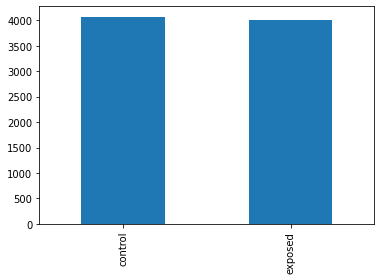

In [ ]:
import matplotlib as plt

experiment = df['experiment'].value_counts()
experiment.plot(kind='bar')

We see from this bar plot that both exposed and control categories in the experiment column have almost the same number of counts.

**Barplot showing the counts of each category in the device_make column. Device_make column has 270 categories.**

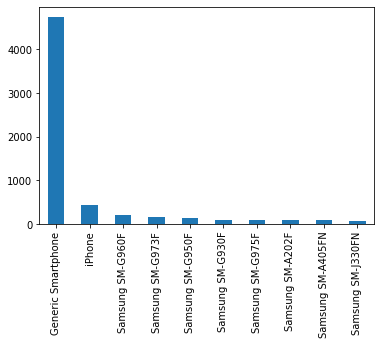

In [ ]:
import matplotlib as plt

device_make = df['device_make'].value_counts()[:10]
device_make.plot(kind='bar')

We see from this bar plot that 'Generic Smartphone' has the highest number of counts in the device_make column. It means that most people used generic phones to fill the questionnaire.

**Barplot showing the counts of each category in the browser column. Browser column has 15 categories.**

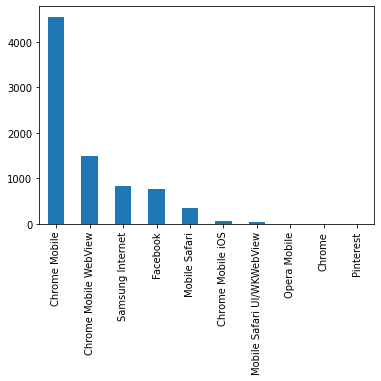

In [ ]:
import matplotlib as plt

browser = df['browser'].value_counts()[:10]
browser.plot(kind='bar')

We see from this bar plot that 'Chrome Mobile' has the highest number of counts in the browser column. It means that most people preferred to use chrome mobile browser to fill the questionnaire.

**Scatterplot showing the joint distribution of the browser and device_make column using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.**


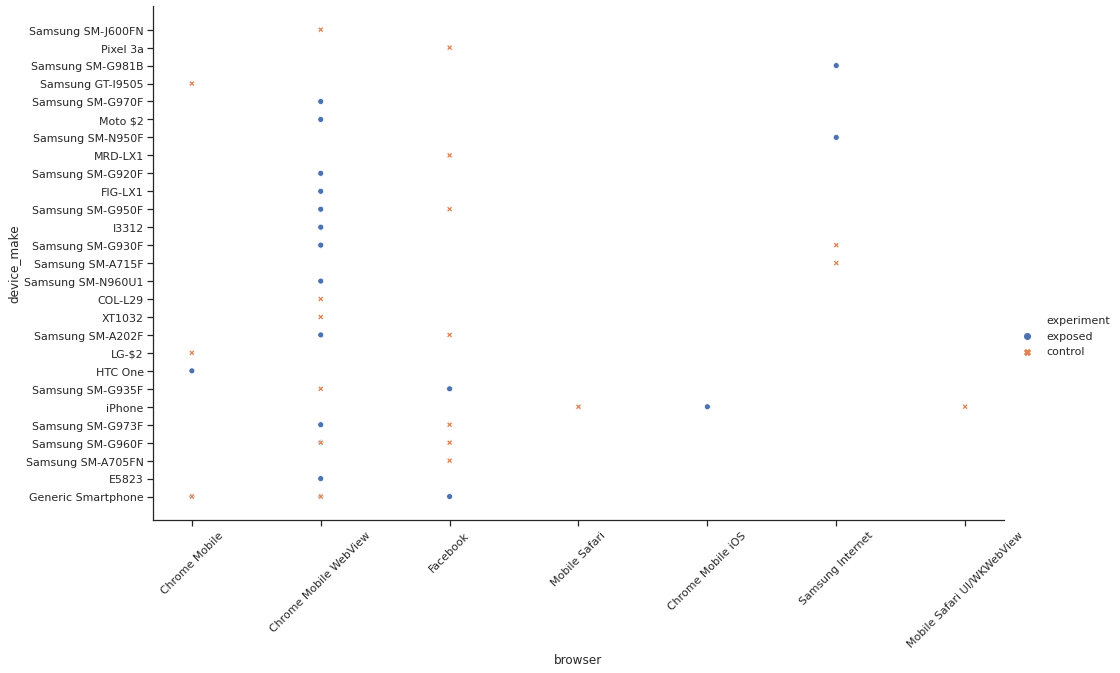

In [ ]:
sns.set(style="ticks")
chart = sns.relplot(x="browser", y="device_make", hue="experiment", style="experiment", height=8, aspect=1.8, data=df[:100])
chart.set_xticklabels(rotation=45)

We see from this scatter plot showing the relationship between "device_make" and "browser column" and using "experiment column" for the variation in color that the exposed group had more occurence than the control group for those that filled the questionnaire on chrome mobile view browser but the control column had more occurence than the exposed column for those that filled the questionnaire on facebook

**Piechart showing the counts of each category in the Experiment column. Experiment column has just 2 categories - exposed and control.**

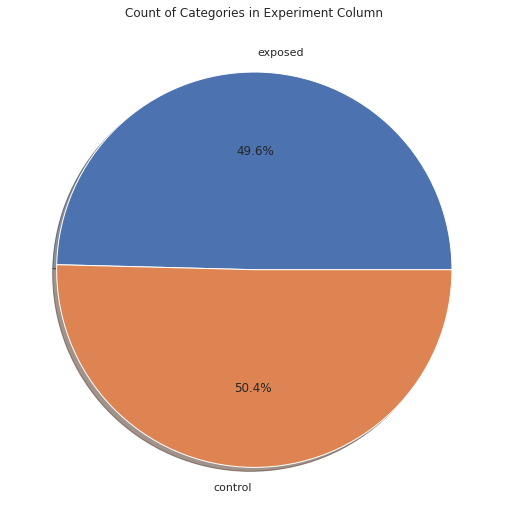

In [ ]:
title_experiment = df.groupby('experiment').agg('count')
experiment_labels = title_experiment.auction_id.sort_values().index 
experiment_counts = title_experiment.auction_id.sort_values()

plt.figure(1, figsize=(40,20)) 
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], aspect=1, title='Count of Categories in Experiment Column')
type_show_ids = plt.pie(experiment_counts, labels=experiment_labels, autopct='%1.1f%%', shadow=True)
plt.show()

We see from the pie-chart above that the control group had about 0.8% higher number of counts than the exposed group.

**Piechart showing the counts of each category in the device_make column. Device_make column has 270 different categories. We just used 30 entries for our piechart.**

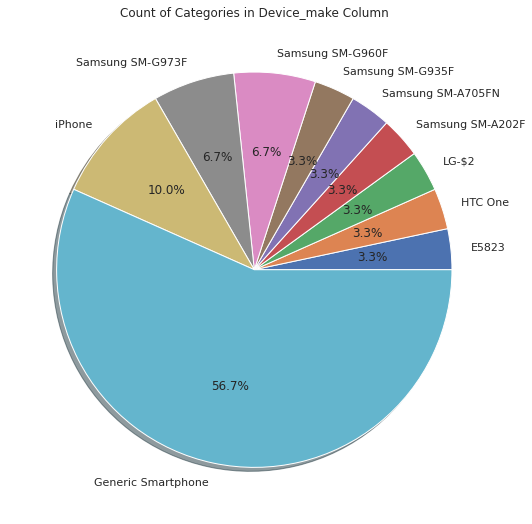

In [ ]:
title_device_make = df[:30].groupby('device_make').agg('count')
device_make_labels = title_device_make.auction_id.sort_values().index 
device_make_counts = title_device_make.auction_id.sort_values()

plt.figure(1, figsize=(40,20)) 
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], aspect=1, title='Count of Categories in Device_make Column')
type_show_ids = plt.pie(device_make_counts, labels=device_make_labels, autopct='%1.1f%%', shadow=True)
plt.show()

We see from the pie-chart above that the "Generic Smartphone" device make has an overall high number of counts compared to any other device make in the dataset. We can say that a high number of people filled the questionnaire from a Generic Smart phone device.

**Piechart showing the counts of each category in the browser column. Browser column has 15 different categories. We just used 30 entries for our piechart.**

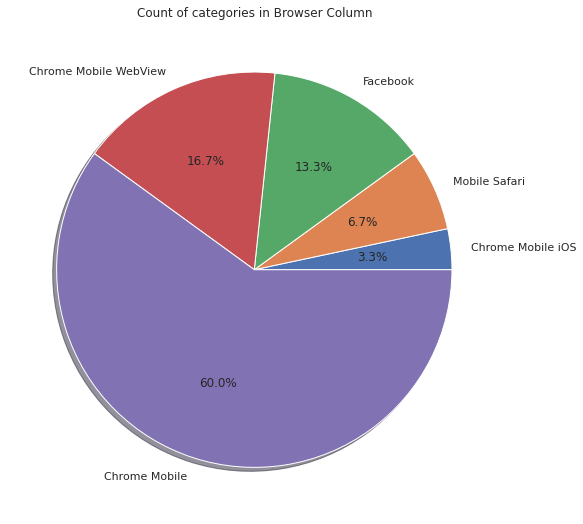

In [ ]:
title_browser = df[:30].groupby('browser').agg('count')
browser_labels = title_browser.auction_id.sort_values().index 
browser_counts = title_browser.auction_id.sort_values()

plt.figure(1, figsize=(40,20)) 
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1], aspect=1, title='Count of Categories in Browser Column')
type_show_ids = plt.pie(browser_counts, labels=browser_labels, autopct='%1.1f%%', shadow=True)
plt.show()

We see from the pie-chart above that the "Chrome Mobile" browser had an overall high number of counts compared to any other browser in the dataset.  We can say that a high number of people filled the questionnaire from a Chrome Mobile browser.

## 4. Perform hypothesis testing: apply the classical p-value based algorithm and the  sequential A/B testing algorithm for which a starter code is provided.**

### Classical p-value Based Algorithm

In [100]:
ab_Summary = df.pivot_table(values=['yes', 'no'], index='experiment', aggfunc=np.sum)

# add additional columns to the pivot table
ab_Summary['total_yes'] = df.pivot_table(values='yes', index='experiment', aggfunc=lambda x: len(x))
ab_Summary['rate_of_yes'] = df.pivot_table(values='yes', index='experiment')

ab_Summary['total_no'] = df.pivot_table(values='no', index='experiment', aggfunc=lambda x: len(x))
ab_Summary['rate_of_no'] = df.pivot_table(values='no', index='experiment')

ab_Summary

,no,yes,total_yes,rate_of_yes,total_no,rate_of_no
experiment,,,,,,
control,322,264,4071,0.064849,4071,0.079096
exposed,349,308,4006,0.076885,4006,0.087119


It looks like the difference in conversion rates between the two groups is 0.0120. This is a good sign but this is not enough evidence for us to confidently go with the new design. At this point we have not measured how confident we are in this result. This can be mitigated by looking at the distributions of the two groups

In [96]:
control_dataframe = df[df['experiment']=='control']
exposed_dataframe = df[df['experiment']=='exposed']

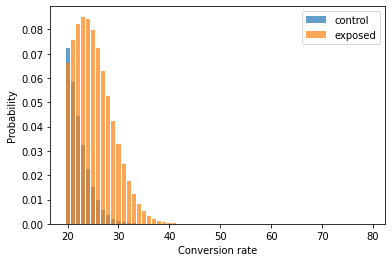

In [97]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

#number of total responses for both control and exposed group
number_control, number_exposed = control_dataframe['yes'].count(), exposed_dataframe['yes'].count()

#number of yes for each control and exposed group
num_of_yes_control, num_of_yes_exposed = control_dataframe['yes'].sum(), exposed_dataframe['yes'].sum()

#rate of success for each control and exposed group
rate_a, rate_b = num_of_yes_control / number_control, num_of_yes_exposed / number_exposed

# Determine the probability of having x number of yes chosen
clicks = np.arange(20, 80)
prob_control = binom(num_of_yes_control, rate_a).pmf(clicks)
prob_exposed = binom(num_of_yes_exposed, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_control, label="control", alpha=0.7)
plt.bar(clicks, prob_exposed, label="exposed", alpha=0.7)
plt.legend()
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

So we can see here that exposed group has an edge, but its certaintly possible if we pick two random points according to the histograms for control group and exposed group, the control group might actually be higher than the exposed group!

Sure, we can work with binomial distributions in this case. As we’re interested in the number of users who chose a yes , or average time spent on the site, this averaging of an underlying distribution means our final estimate will be well approximated by a normal distribution.

So let’s reformulate, using the normal approximation here:

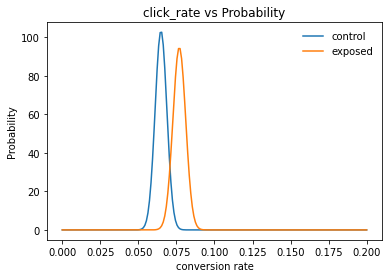

In [102]:
from scipy.stats import norm

# Where does this come from? See the link above.
std_a = np.sqrt(rate_a * (1 - rate_a) / number_control)
std_b = np.sqrt(rate_b * (1 - rate_b) / number_exposed)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="control")
plt.plot(click_rate, prob_b, label="exposed")
plt.title("click_rate vs Probability")
plt.legend(frameon=False)

#we define our conversion rate as the number of times we got a yes for an answer
plt.xlabel("conversion rate"); plt.ylabel("Probability");

This is also a better plot than the first one but What is the chance that a the new advert had more likes than the old one. Is it significant?

This is simple - take the difference in the means and sum the variance. We’ll do two things below: First, get the z-score, and second, plot the proper distribution.

zscore is 2.108, with p-value 0.018


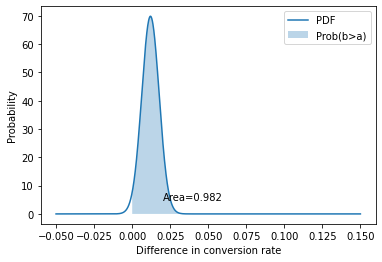

In [103]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Probability");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

* **Null hypothesis: exposed group is less than the control group**

* **Alternative hypothesis test: exposed group is greater than the control group**

**Using our approach so far, we would say that given the null hypothesis is true (that the exposed group  is less then or equal to the control group), we would expect to get this result or a result more extreme only 0.018 * 100 = 1.8% (which is the value of our p) number of times.**

**As that is a significant result (typically p < 5%), we reject the null hypothesis, and state that we have evidence that the exposed group is greater than the control group. We can go ahead with to say that the adverts that the advertising company runs resulted in a significant lift in brand awareness.**

### Sequential A/B testing Algorithm

* **Null hypothesis: exposed group is less than the control group**

* **Alternative hypothesis test: exposed group is greater than the control group**

* **We wish to test the simple null hypothesis that "θ = exposed group is less than than the control group" versus the simple alternative hypothesis that "θ = The exposed group is greater than the control group" at the α=0.05 level.**

* **In sequential test, given the total sample size N, we try to see if the critical value for the current sample size was gotten before the sample finished. This makes it better compared to classical p value test as we do not need to know the number of samples before-hand.**

* **If the critical point becomes greater than the alpha 0.05 level value, we reject the null hypothesis straightaway even if we did not look through all our samples. This is an advantage over the classical p value testing**

* **To model the ongoing monitoring of this experiment, we define a random variable N=min{n≥1|∑ni=1Xi>n−−√z0.05}, called the stopping time.**

* **The random variable N is the first time that the test statistic exceeds the critical value, and the naive approach to sequential testing would reject the null hypothesis after N samples.**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Here we use a Monte Carlo method to approximate the level of this naive sequential test. We used the total sample of 4071 which is our control sample out sample, assuming the null hypothesis is true.**

In [111]:
from __future__ import division

import numpy as np
from scipy import stats

n = 100
N = 4071

samples = stats.norm.rvs(size=(N, n))

Here each row of samples corresponds to a simulation and each column to a sample.

Now we calculate the proportion of these simulated experiments that would have been stopped before 4071 samples, trying to reject the null hypothesis that the exposed group is less then or equal to the control group is true.

In [112]:
alpha = 0.05
z_alpha = stats.norm.isf(alpha)

cumsums = samples.cumsum(axis=1)
ns = np.arange(1, n + 1)

np.any(cumsums > np.sqrt(ns) * z_alpha, axis=1).sum() / N

0.30140014738393517

We see that the actual level of this test is an order of magnitude larger than the desired level of α=0.05. 

**We see that our critical value is greater than alpha testing level of 0.05, we then go ahead to reject the null hypothesis that the exposed group is less than or equal to the control group.**

**Are the number of data points in the experiment enough to make a reasonable judgement or should the company run a longer experiment? Remember that running the experiment longer may be costly for many reasons, so you should always optimize the number of samples to make a statistically sound decision.**

* I feel they are number of data points in the experiment are enough to make a reasonable judgement.

**My Explanation**
* We got the same result using both the classical p-value test and sequential test. In classical test, we understand that the number of samples need to be known before-hand but in the sequential test, the number of samples does not necessarily need to be known before-hand. We got a rejection in the null hypothesis for both the classical and sequential. I feel since sequential test does not really matter with the size of sample, and we got a rejection in the null hypothesis, we can say the number of samples or data points is not a factor in getting the accuracy of the test.

**What does your A/B testing analysis tell you? Is brand awareness increased for the exposed group?**

* Yes,  brand awareness increased for the exposed group.

* From my classical p-value analysis, we saw that our null hypothesis was rejected that the exposed group is less than or equal to the control group. Using our approach so far, we would say that given the null hypothesis is true (that the exposed group  is less then or equal to the control group), we would expect to get this result or a result more extreme only 0.018 * 100 = 1.8% (which is the value of our p) number of times.

* As that is a significant result (typically p < 5%), we reject the null hypothesis, and state that we have evidence that the exposed group > control group. We can go ahead with to say that the adverts that the advertising company runs resulted in a significant lift in brand awareness.

* For sequential tesing, we wanted to know if the critical value was reached before the number of samples got exhausted. We got a critical value of 0.3014 which is greater than the alpha level testing. We can say that the nulll hypothesis is rejected that the exposed group is less than or equal to the control group.

## Machine Learning

In max three statements, make a problem formulation for machine learning and specify the target variable

* A major issue with traditional, statistical-inference approaches to A/B Testing is that it only compares 2 variables - an experiment/control to an outcome. The problem is that customer behavior is vastly more complex than this, Customers take different paths, spend different amounts of time on the site, come from different backgrounds (age, gender, interests), and more. This is where Machine Learning excels - generating insights from complex systems

**Split the data into 70% training, 20% validation, and 10% test sets.**

In [ ]:
train, validate, test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.67*len(df))])

In [ ]:
train.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
6912,dbd9e245-12dc-4ec4-8e48-87ffe5b27767,exposed,2020-07-05,10,Generic Smartphone,6,Chrome Mobile,0,0
3156,65ef068c-46a3-4e00-8e8b-29008a04b7d3,control,2020-07-10,6,Generic Smartphone,6,Chrome Mobile,0,0
3116,64d4b638-22fa-4c05-9cfd-0d73855b89c0,exposed,2020-07-10,3,Samsung SM-A105FN,6,Facebook,0,0
4894,9bd5f8df-0f62-49fa-9ff4-c8df3f11813d,control,2020-07-05,20,Generic Smartphone,6,Chrome Mobile,0,0
615,130ed201-5a53-4622-bf54-46effe04a6c0,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [ ]:
validate.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [ ]:
test.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
4590,925543a9-3aa4-4121-96e3-7fb642868771,control,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,0,0
5732,b4b8c6cb-7e69-4513-a101-58617a02a66a,control,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,0
1884,3e33f885-d358-4738-aab9-78244052fc21,exposed,2020-07-06,3,Samsung SM-G970F,6,Samsung Internet,1,0
1148,258eabe4-89ef-4ded-9323-916316cd4d19,exposed,2020-07-09,4,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
7636,f1b1b1bb-dc80-4775-a3ba-4ce61a74af3f,control,2020-07-05,16,Generic Smartphone,6,Chrome Mobile,0,0


np.split will split at 70% of the length of the shuffled array, then 67% of length (which is an additional 20.1% of data), thus leaving a remaining 10% of the data. 

Based on the reading material provided, apply machine learning to the training data. Train a machine learning model using 5-fold cross validation the following 3 different algorithms:
* Logistic Regression
* Decision Trees
* XGBoost

In [39]:
MC_data = df2[["experiment", "device_make", "browser","yes"]]
MC_data.head()

X = MC_data[['experiment','device_make', 'browser']]
Y = MC_data['yes']

In [40]:
from sklearn import linear_model
from sklearn import preprocessing

# Initialize label encoder categorical data to assign numeric values to categorical variables for the purpose of training model with machine learning
label_encoder = preprocessing.LabelEncoder()
encoded_exp = label_encoder.fit_transform(MC_data['experiment'])
encoded_dev = label_encoder.fit_transform(MC_data['device_make'])
encoded_brw = label_encoder.fit_transform(MC_data['browser'])
X_features = pd.DataFrame([encoded_exp,encoded_dev, encoded_brw]).T
X_features.columns = ['experiment','device_make','browser']
X_features.head()

,experiment,device_make,browser
0,1,46,2
1,1,46,2
2,1,29,3
3,0,137,6
4,0,46,2


We see from the above that our three column featues: experiment, device_make and browser have been assigned numerical values

In [41]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y,test_size=0.10,random_state=0)

#train dataset for x variable
X_train.head()

,experiment,device_make,browser
4250,1,46,2
2549,0,46,2
3790,1,101,14
1995,1,64,3
7344,1,90,3


In [ ]:
#test dataset for x variable
X_test.head()

,experiment,device_make,browser
5988,1,46,2
7490,1,184,3
1811,0,46,2
3121,0,46,2
4459,1,46,2


Train a machine learning model using 5-fold cross validation:

In [42]:
from sklearn.model_selection import KFold
def model_predictor(model, x, y):
    scores = []
    kf = KFold(n_splits=5, random_state=0, shuffle=True)
    for train_index, test_index in kf.split(X_train):
        KX_train, KX_test = X_train.iloc[train_index], X_train.iloc[test_index]
        Ky_train, Ky_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
        trained_model = model.fit(KX_train, Ky_train)
        scores.append(model.score(X = KX_test ,y = Ky_test))
    return trained_model, scores

Train a machine learning model using 5-fold cross validation the following 3 different algorithms:
* Logistic Regression 
* Decision Trees
* XGBoost


In [51]:
# Initialize logistic regression model
logReg_model = linear_model.LogisticRegression(solver='lbfgs')

#Initialize decision tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

#initialize XGBoost
!pip install xgboost
import xgboost as xgb
XGB_model = xgb.XGBClassifier()

## Logistic Regression Training Model

In [53]:
#fit models, predict and determine scores
#we put our train models x_train and y_train into the logistic regression model
logReg_model_trained_model, logReg_model_scores,  = model_predictor(logReg_model, X_train, Y_train)
logReg_model_trained_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
logReg_model_scores

[0.9353507565337001,
 0.9298486932599724,
 0.9277854195323246,
 0.9195323246217332,
 0.9284239504473503]

In [87]:
#make predictions with validation set
y_prediction = pd.DataFrame(log_model.predict(X_test), columns=["y_prediction"])

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, y_prediction))

print("mean scores computed" + " : " + str(np.mean(logReg_model_scores)))
print("std of scores computed" + " : " + str(np.std(logReg_model_scores)))
print("the loss function is" + " :  "+ str(rmse))

mean scores computed : 0.9281882288790161
std of scores computed : 0.0050833343959127255
the loss function is :  0.2487592975524973


In supervised machine learning algorithms, we want to minimize the error for each training example during the learning process. This is done using some optimization strategies like gradient descent. And this error comes from the loss function.

Our loss function is 24.8% which is okay....

**Logistic Regression Model Evaluation using Confusion Matrix**

* A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [59]:
# import the metrics class
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, y_prediction)
confusion_matrix

array([[758,   0],
       [ 50,   0]])

Here, we can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 758 and 0 are actual predictions, and 50 and 0 are incorrect predictions.

**Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.**

In [46]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

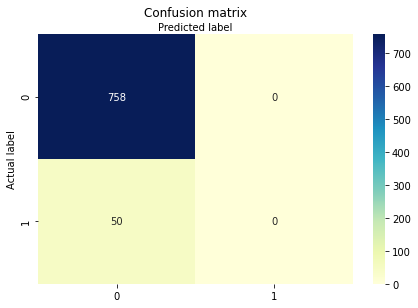

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [115]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_prediction))

Accuracy: 0.9381188118811881


**Well, we got a classification rate of 93.81%, considered as good accuracy.**

**Advantages of Logistic Regression**

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

**Disadvantages of Logistic Regression**

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## Decision Trees Training Model

tree_model_trained_model

In [84]:
tree_model_trained_model, tree_model_scores = model_predictor(tree_model, X_train, Y_train)
tree_model_trained_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
tree_model_scores

[0.9305364511691885,
 0.9243466299862448,
 0.9243466299862448,
 0.9188445667125172,
 0.9249827942188575]

In [86]:
#make predictions with validation set
y_prediction_tree = pd.DataFrame(tree_model.predict(X_test), columns=["y_pred"])

from sklearn.metrics import mean_squared_error
rmse_tree = np.sqrt(mean_squared_error(Y_test, y_prediction_tree))

print("mean scores computed" + " : " +str(np.mean(tree_model_scores)))
print("mean scores computed" + " : " +str(np.std(tree_model_scores)))
print("the loss function is" + " : "+str(rmse_tree))

#feature importance
print(dict(zip(X_features.columns, tree_model_trained_model.feature_importances_)))

mean scores computed : 0.9246114144146105
mean scores computed : 0.003705151481606406
the loss function is : 0.26326209505561055
{'experiment': 0.12040546764055521, 'device_make': 0.6764448988909756, 'browser': 0.20314963346846934}


In supervised machine learning algorithms, we want to minimize the error for each training example during the learning process. This is done using some optimization strategies like gradient descent. And this error comes from the loss function.

Our loss function is 26.3% which is a little bit okay....

**Decison Tree Model Evaluation using Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [77]:
# import the metrics class
from sklearn import metrics
confusion_matrix_decisiontree = metrics.confusion_matrix(Y_test, y_p_tree)
confusion_matrix_decisiontree

array([[752,   6],
       [ 50,   0]])

Here, we can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 752 and 0 are actual predictions, and 50 and 6 are incorrect predictions.

**Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.**

Text(0.5, 257.44, 'Predicted label')

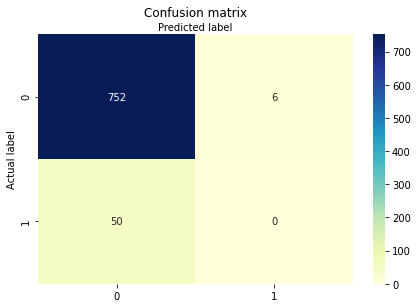

In [78]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_decisiontree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [114]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_prediction_tree))

Accuracy: 0.9306930693069307


**Well, we got a classification rate of 93.06%, considered as good accuracy.**

## XGBoost Training Model

In [89]:
XGB_model_trained_model, XGB_model_scores = model_predictor(XGB_model, X_train, Y_train)
print("mean scores computed" + ":" +str(np.mean(XGB_model_scores)))
print("mean scores computed" + ":" +str(np.std(XGB_model_scores)))

#make predictions with validation set
y_prediction_XGB = pd.DataFrame(XGB_model.predict(X_test), columns=["y_pred"])
com_XGB = pd.concat([Y_test,y_prediction_XGB], axis=1)
com_XGB.head()
from sklearn.metrics import mean_squared_error
rmse_XGB = np.sqrt(mean_squared_error(Y_test, y_prediction_XGB))
print("the loss function is" + ": " +str(rmse_XGB))
#feature importance
print(dict(zip(X_features.columns, XGB_model_trained_model.feature_importances_)))

mean scores computed:0.9281882288790161
mean scores computed:0.0050833343959127255
the loss function is: 0.2487592975524973
{'experiment': 0.39267474, 'device_make': 0.4145345, 'browser': 0.19279072}


In supervised machine learning algorithms, we want to minimize the error for each training example during the learning process. This is done using some optimization strategies like gradient descent. And this error comes from the loss function.

Our loss function is 24.8% which is a little bit okay....

**XGBoost Model Evaluation using Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [91]:
# import the metrics class
from sklearn import metrics
confusion_matrix_xgboost = metrics.confusion_matrix(Y_test, y_prediction_XGB)
confusion_matrix_xgboost

array([[758,   0],
       [ 50,   0]])

Here, we can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 758 and 0 are actual predictions, and 50 and 0 are incorrect predictions.

**Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.**

Text(0.5, 257.44, 'Predicted label')

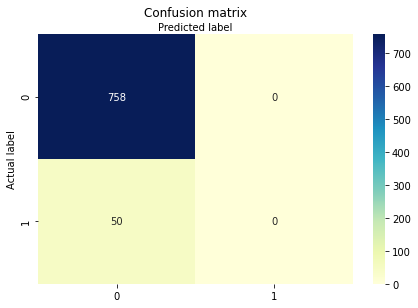

In [92]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_xgboost), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [113]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_prediction_XGB))

Accuracy: 0.9381188118811881


**Well, we got a classification rate of 93.81%, considered as good accuracy.**

#### Compute feature importance - what’s driving the model? Which parameters are important predictors for the different ML models? What contributes to the goal of gaining more “Yes” results?

#### - **From above, it seen that name of the type of device the user has is a strong predictor driving the model. It therefore contributes more to the goal of gaining more “yes” results.**

#### Which data features are relevant to predicting the target variable?

#### - **The data feature with the highest number of scores which is the device_make.**

#### Explain what the difference is between using A/B testing to test a hypothesis vs using Machine learning to learn the viability of the same effect?

####- **A major issue with traditional, statistical-inference approaches to A/B Testing is that it only compares 2 variables - an experiment/control to an outcome. The problem is that customer behavior is vastly more complex than this. Customers take different paths, spend different amounts of time on the site, come from different backgrounds (age, gender, interests), and more. This is where Machine Learning excels - generating insights from complex systems.**



#### Explain the purpose of training using k-fold cross validation instead of using the whole data to train the ML models?

#### - **Evaluating a Machine Learning model can be quite tricky. Usually, we split the data set into training and testing sets and use the training set to train the model and testing set to test the model. We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. This article will explain in simple terms what K-Fold CV is and how to use the sklearn library to perform K-Fold CV.**

#### What information do you gain using the Machine Learning approach that you couldn’t obtain using A/B testing?

#### - **I got to understand that the system is driven by Pageviews and Clicks. Statistical Inference would not have identified these drivers. Machine Learning did.**

#### - **Providing a direction and magnitude of the experiment - We saw that Experiment = 1 drops enrollments by -17.6 Enrollments Per Day in the Linear Regression. We saw similar drops in the Decision Tree rules. Statistical inference would not have identified magnitude and direction. Only whether or not the Experiment had an effect.**

#### Overall Result

#### * **I noticed that for all the three machine learning classifiers (logistic regression, decision tree and xgboost), we got the almost the same results:**

* ### Our models predicted accurately about 93% of the time and We got a loss function of about 24% for each model.

* ### I saw that in the classical and sequential tests, the null hypothesis was rejected that the exposed group is less than or equal to the conrol group. Control: users who have been shown a dummy ad while Exposed:  users who have been shown a creative, an online interactive ad, with the SmartAd brand. 

* ### We can conclude that the users shown a creative, an online interactive ad are more than the users who had been shown a dummy advert. 